In [59]:
# Autor: Lopez Rodriguez Jesus Inocencio
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Accediendo al archivo CSV
dataframe = pd.read_csv("DSCancerDeMamaSinDatosPerdidos.csv",sep=';')
clasificadores = ['Benigno','Maligno']
dataframe.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [61]:
dataframe.describe()

,BIRADS,Age,Shape,Margin,Density,Severity
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,4.314634,55.739024,2.775610,2.808537,2.915854,0.481707
std,0.669248,14.684062,1.243647,1.569295,0.351508,0.499970
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.750000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [63]:
dataframe.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

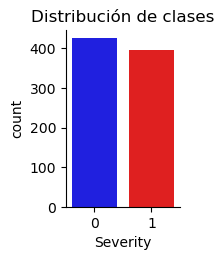

In [65]:
# Mostrar gráfico de barras
import seaborn as sb

#Aseguramos que los números son enteros
dataframe['Severity'] = dataframe['Severity'].astype(int)
sb.catplot(x='Severity', hue='Severity', data= dataframe, kind="count", height=2.5, aspect=0.8, palette={0:"blue",1:"red"}, legend=False)
plt.title("Distribución de clases")
plt.show()

In [69]:
y = dataframe['Severity'] #Variable Dependiente
x = dataframe.drop('Severity',axis=1) #Variable Independiente

         Benigno  Maligno
Benigno      105       14
Maligno       26      101
              precision    recall  f1-score   support

     Benigno       0.80      0.88      0.84       119
     Maligno       0.88      0.80      0.83       127

    accuracy                           0.84       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.84      0.84      0.84       246



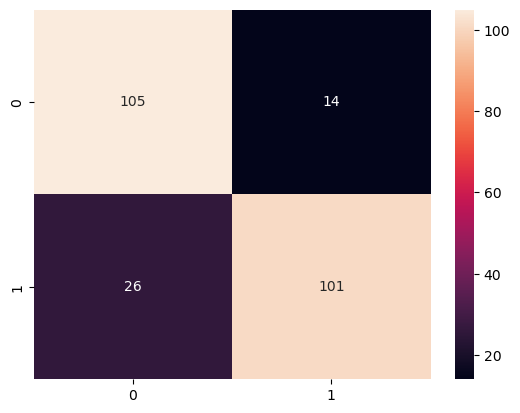

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=3)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
            
labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))

print(classification_report(y_test,predicciones,target_names=clasificadores))
#Columnas lo que dice el sistema, filas lo que dice la realidad

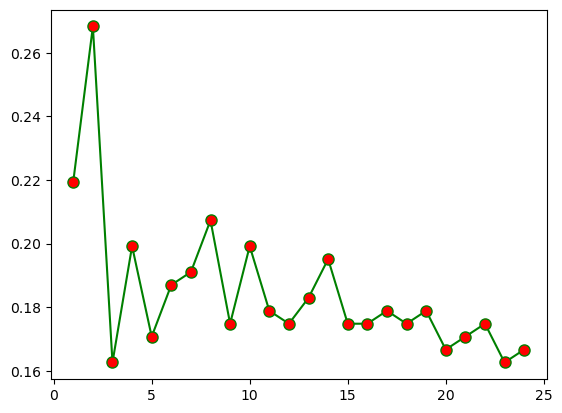

In [99]:
# BUSCAR TASA DE ERROR PARA ENCONTRAR EL K ÓPTIMO
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor = 'red', markersize='8')

              precision    recall  f1-score   support

     Benigno       0.80      0.88      0.84       119
     Maligno       0.88      0.80      0.83       127

    accuracy                           0.84       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.84      0.84      0.84       246



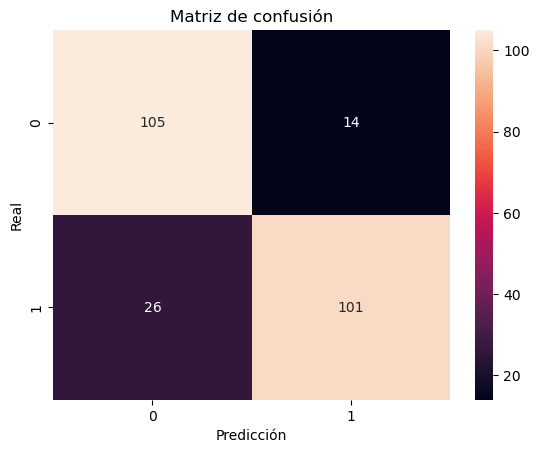

In [105]:
knn_mm = KNeighborsClassifier(n_neighbors=3)
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test, predicciones, target_names=clasificadores))

In [107]:
#BIRADS Edad Forma Margen Densidad
print(knn_mm.predict([[4,65,3,5,3]]))
print(knn_mm.predict_proba([[4,65,3,5,3]]))

[0]
[[0.66666667 0.33333333]]


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [111]:
#Corregimos la advertencia
print(knn_mm.predict(pd.DataFrame([[4,65,3,5,3]], columns=x.columns)))
print(knn_mm.predict_proba(pd.DataFrame([[4,65,3,5,3]], columns=x.columns)))

[0]
[[0.66666667 0.33333333]]
